# Downloading and preparing stock data

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

start_date = '2010-01-01'
end_date = '2020-01-01'
ticker = '^OMX'
df = yf.download(ticker,start_date,end_date)
df.index = df.index.date
df.index.name = "Date"

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,951.719971,964.729980,951.719971,963.559998,963.559998,82515400
2010-01-05,964.030029,968.679993,961.460022,967.270020,967.270020,62738400
2010-01-07,967.390015,970.260010,962.270020,965.820007,965.820007,132590900
2010-01-08,965.700012,974.900024,965.700012,973.440002,973.440002,108703800
2010-01-11,973.150024,985.690002,973.150024,978.179993,978.179993,108829800


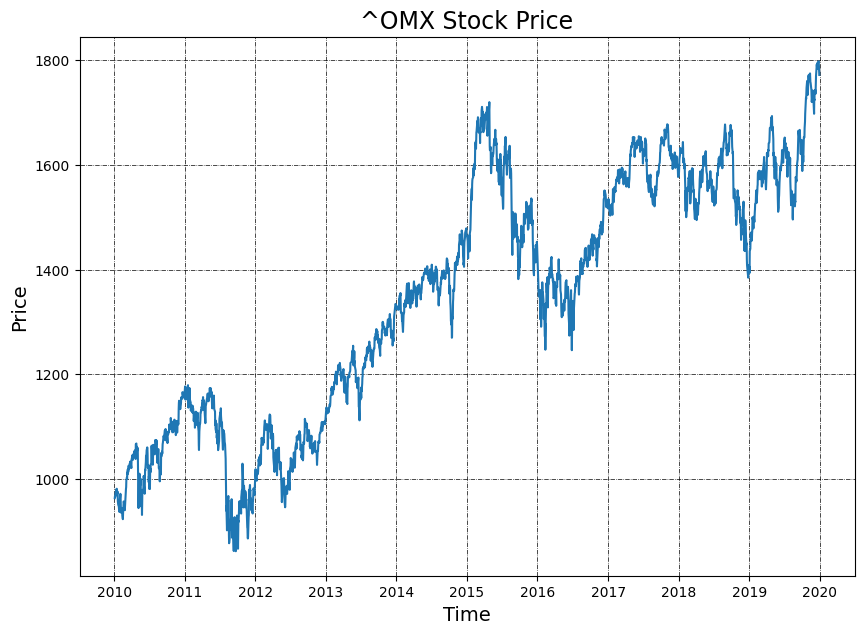

In [17]:
# Stock price plot

df['Adj Close'].plot(figsize=(10,7))
plt.title("%s Stock Price" %ticker,fontsize=17)
plt.xlabel("Time",fontsize=14)
plt.ylabel("Price",fontsize=14)
plt.grid(which="major", color='k',linestyle='-.',linewidth=0.5)

In [18]:
# check for missing values

df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [19]:
# Preparing X and y to train
#data = df.reset_index()
#X = np.array(data.index).reshape(-1,1)

df2 = df['Adj Close']
df2 = pd.DataFrame(df2)
df2

days_predicted = 500
df2['Prediction'] = df2['Adj Close'].shift(-days_predicted)

X = np.array(df2.drop(['Prediction'], 1))[:-days_predicted]

y = np.array(df2['Prediction'])[:-days_predicted]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.75)



C:\Users\Henke\AppData\Local\Temp\ipykernel_8972\1080348666.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df2.drop(['Prediction'], 1))[:-days_predicted]


# Decision tree regression

In [20]:
tree = DecisionTreeRegressor().fit(X_train, y_train)

X_future = df2.drop(['Prediction'], 1)[:-days_predicted]
X_future = X_future.tail(days_predicted)
X_future = np.array(X_future)
X_future[0:10]

C:\Users\Henke\AppData\Local\Temp\ipykernel_8972\128795934.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_future = df2.drop(['Prediction'], 1)[:-days_predicted]


array([[1387.0300293 ],
       [1357.11999512],
       [1348.76000977],
       [1348.64001465],
       [1351.26000977],
       [1360.97998047],
       [1339.4699707 ],
       [1305.23999023],
       [1306.02001953],
       [1332.17004395]])

C:\Users\Henke\AppData\Local\Temp\ipykernel_8972\3212556402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


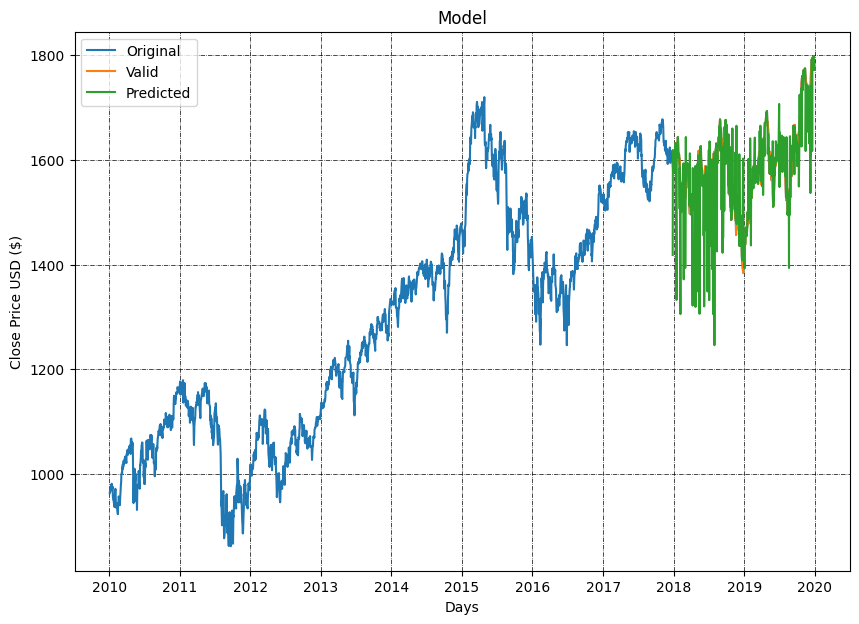

In [21]:
predictions = tree.predict(X_future)
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(10,7))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.grid(which="major", color='k',linestyle='-.',linewidth=0.5)
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()